In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from importlib import reload

In [2]:
# Add fonts to matplotlib cache.
import matplotlib
from pathlib import Path
for path in Path("../../../common/fonts/").rglob('*.otf'):
    matplotlib.font_manager.fontManager.addfont(str(path))

In [3]:
plt.style.use("matplotlib.mplstyle")

# Load data

In [25]:
data = pd.read_csv("../Data/imputed_data.mice.csv")
data = data.assign(coating = data[['lobe', 'full', 'other']].idxmax(axis=1))
data = data.assign(coatingId = data.coating.replace(data.coating.unique(),
                                                    range(len(data.coating.unique()))))

# Save the classes for verification
df = data[data.imp == 1].set_index('name')[['imp', 'coatingId', 'full', 'lobe', 'other', 'coating']]
df.to_csv("../Data/imputed_data.classes.csv")

In [26]:
dobs = data[data.imp == 0]

## Distribution of classes

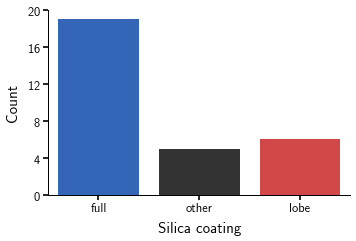

In [27]:
fig, ax = plt.subplots(figsize=(3.25, 2.0))
sns.countplot(x=data[data.imp == 0].coating, ax = ax)
ax.set(yticks = range(0, 21, 4), ylabel = 'Count')
plt.minorticks_off()
plt.xlabel("Silica coating")
plt.savefig("../Plots/x8_class_counts.png")
plt.show()

In [154]:
def plot_class_scatter(df, cols, by, name):
    height = len(cols)*0.6
    if height < 1.8:
        height = 1.8
    fig, ax = plt.subplots(len(cols), 1, figsize=(2.66, height))
    for i, col in enumerate(cols):
        if col == by: continue
        sns.scatterplot(data=df, x=col, y = np.random.normal(i, 0.1, size=df.shape[0]), hue = by, ax = ax[i])
        ax[i].legend([],[], frameon=False)
        ax[i].set(yticks=[], xlabel="", ylim = (i-1, i+1))
        ax[i].set_ylabel(col)

    ax[0].legend(loc=(.02, 1.01), ncol=3, frameon=False, columnspacing=0.5)
    # plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(name)
    print("Save OK:", name, "Height:", height)
    plt.show()

Save OK: ../Plots/x8_class_scatter_teos.png Height: 1.8


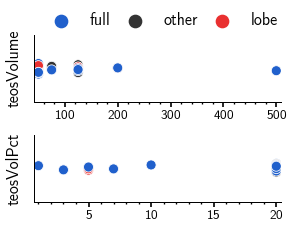

Save OK: ../Plots/x8_class_scatter_gold.png Height: 2.4


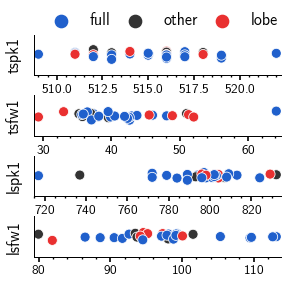

Save OK: ../Plots/x8_class_scatter_reac.png Height: 2.4


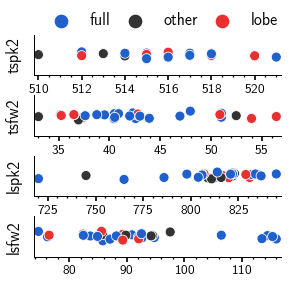

Save OK: ../Plots/x8_class_scatter_pure.png Height: 2.4


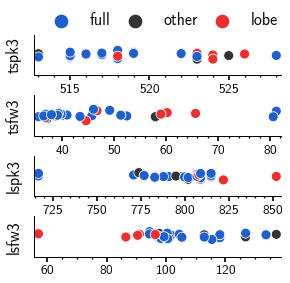

In [155]:
df = dimp.set_index('name')
plot_class_scatter(df, ['teosVolume', 'teosVolPct'], 'coating',
                   name = "../Plots/x8_class_scatter_teos.png")
plot_class_scatter(df, ['tspk1', 'tsfw1', 'lspk1', 'lsfw1'], 'coating',
                   name = "../Plots/x8_class_scatter_gold.png")
plot_class_scatter(df, ['tspk2', 'tsfw2', 'lspk2', 'lsfw2'], 'coating',
                   name = "../Plots/x8_class_scatter_reac.png")
plot_class_scatter(df, ['tspk3', 'tsfw3', 'lspk3', 'lsfw3'], 'coating',
                   name = "../Plots/x8_class_scatter_pure.png")

Save OK: ../Plots/x8_class_scatter_reac_shifts.png Height: 3.5999999999999996


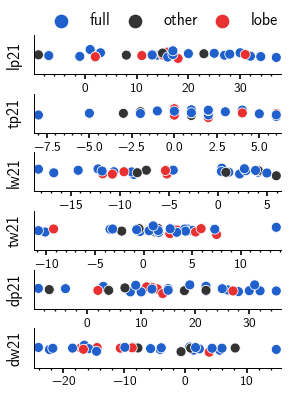

Save OK: ../Plots/x8_class_scatter_pure_shifts.png Height: 3.5999999999999996


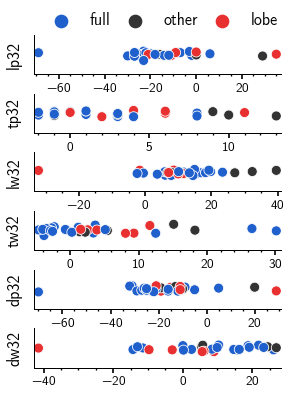

Save OK: ../Plots/x8_class_scatter_total_shifts.png Height: 3.5999999999999996


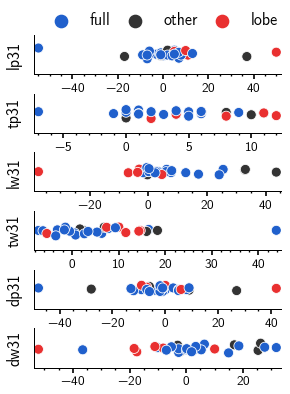

In [156]:
df = dimp.set_index('name')
ml = pipeline.Pipeline(df)
ml.AddFeatures([features.Differences], show_list=False)
df = ml.Tr
cols = df.columns[df.columns.str.contains('21')]
plot_class_scatter(df, cols, 'coating',
                   name = "../Plots/x8_class_scatter_reac_shifts.png")
cols = df.columns[df.columns.str.contains('32')]
plot_class_scatter(df, cols, 'coating',
                   name = "../Plots/x8_class_scatter_pure_shifts.png")
cols = df.columns[df.columns.str.contains('31')]
plot_class_scatter(df, cols, 'coating',
                   name = "../Plots/x8_class_scatter_total_shifts.png")

# BoxPlot - Initialize

In [28]:
def plot_class_boxplots(df, cols, by, name):
    n = len(cols)
    if n == 2:
        r = 1
        c = 2
    elif n == 4:
        r = 2
        c = 2
    elif n == 6:
        r = 2
        c = 3
    else:
        c = 3
        r = n // c
    height = 1.2
    if r > 1:
        height = r * 1.1
    fig = plt.figure(figsize = (2*c, height))
    for i in range(n):
        col = cols[i]
        ax = fig.add_subplot(r, c, i+1)
        sns.boxplot(x = by, y = col, data = df, linewidth=0.6)
        ax.set_xlabel('')

    plt.tight_layout()
    plt.savefig(name)
    print("Save OK:", name, "Height:", height)
    plt.show()

In [29]:
import pipeline as pl
from model.AdFeatures import *

In [30]:
df = dobs.set_index('name')
df = Differences(df)
df.columns

Index(['imp', 'id', 'tspk1', 'tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2',
       'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume',
       'teosVolPct', 'quality', 'lobe', 'full', 'other', 'coating',
       'coatingId', 'lp21', 'lp31', 'lp32', 'tp21', 'tp31', 'tp32', 'lw21',
       'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp11', 'dp22', 'dp33', 'dp21',
       'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32'],
      dtype='object')

# BoxPlots - Property Specific

Save OK: ../Plots/x8_class_boxplot_teos.png Height: 1.2


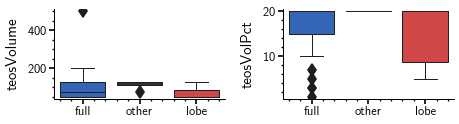

Save OK: ../Plots/x8_class_boxplot_lspr.png Height: 4.4


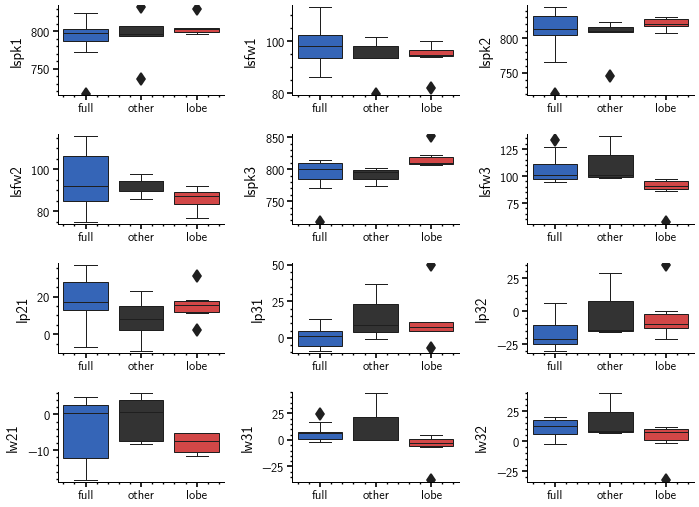

Save OK: ../Plots/x8_class_boxplot_tspr.png Height: 4.4


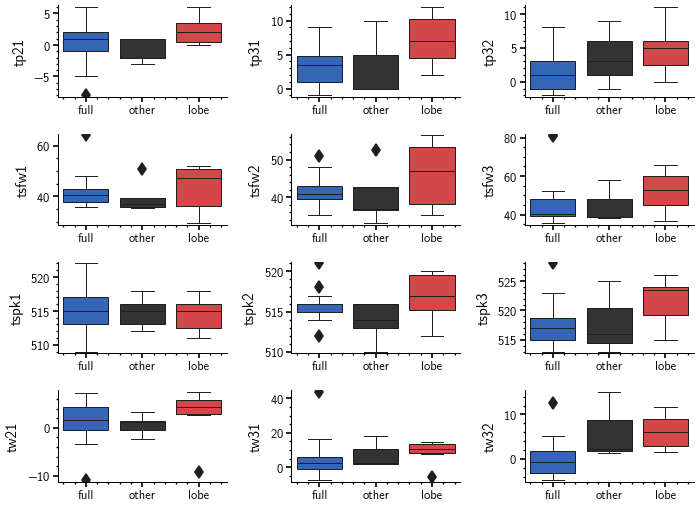

In [31]:
df = df.drop(['lobe', 'full', 'other'], axis=1)
cols = df.columns[df.columns.str.startswith('teos')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_teos.png")
cols = df.columns[df.columns.str.startswith('l')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_lspr.png")
cols = df.columns[df.columns.str.startswith('t')].difference(['teosVolume', 'teosVolPct'])
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_tspr.png")

# BoxPlots - Stage Changes

Save OK: ../Plots/x8_class_boxplot_21.png Height: 2.2


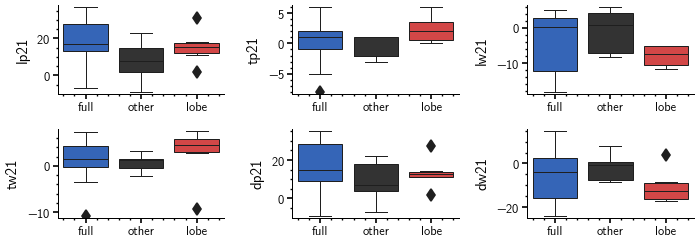

Save OK: ../Plots/x8_class_boxplot_31.png Height: 2.2


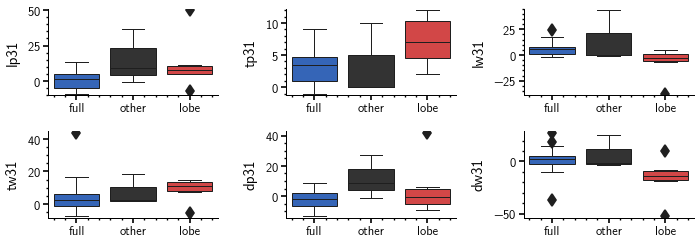

Save OK: ../Plots/x8_class_boxplot_32.png Height: 2.2


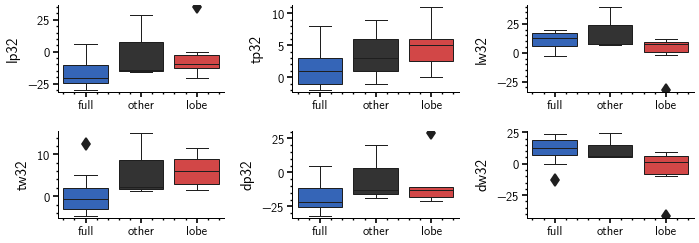

In [32]:
cols = df.columns[df.columns.str.contains('21')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_21.png")

cols = df.columns[df.columns.str.contains('31')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_31.png")

cols = df.columns[df.columns.str.contains('32')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_32.png")